## Лабораторна робота 4. **REGRESSION** 📈

# Опис вибірки "Motorbike Ambulance Calls"


Аварії за участю мотоциклів та відповідні виклики швидкої допомоги сильно залежать від екологічних та сезонних умов, таких як погодні умови, опади, день тижня, сезон, година дня тощо. Дані збирались протягом двох років щогодини та потім співвідносилися з відповідною погодою та сезонністю.

Основні характеристики вибірки `motorbike_ambulance_calls.csv`:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `motorbike_ambulance_calls.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. окремо вивести максимальні та мінімальні значення по всім змінним;  
5. вивести розмірність датасету;

In [556]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [557]:
def get_data(data_path: str):
  return pd.read_csv(data_path)

In [558]:
dataset_calls = get_data(data_path='motorbike_ambulance_calls.csv')
dataset_calls.head(10)

,index,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1/1/11,spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,2,1/1/11,spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,3,1/1/11,spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,4,1/1/11,spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,5,1/1/11,spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
5,6,1/1/11,spring,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,1
6,7,1/1/11,spring,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2
7,8,1/1/11,spring,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,3
8,9,1/1/11,spring,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,8
9,10,1/1/11,spring,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,14


In [559]:
print(dataset_calls.describe().T)

              count         mean          std   min        25%        50%  \
index       17379.0  8690.000000  5017.029500  1.00  4345.5000  8690.0000   
yr          17379.0     0.502561     0.500008  0.00     0.0000     1.0000   
mnth        17379.0     6.537775     3.438776  1.00     4.0000     7.0000   
hr          17379.0    11.546752     6.914405  0.00     6.0000    12.0000   
holiday     17379.0     0.028770     0.167165  0.00     0.0000     0.0000   
weekday     17379.0     3.003683     2.005771  0.00     1.0000     3.0000   
workingday  17379.0     0.682721     0.465431  0.00     0.0000     1.0000   
weathersit  17379.0     1.425283     0.639357  1.00     1.0000     1.0000   
temp        17379.0     0.496987     0.192556  0.02     0.3400     0.5000   
atemp       17379.0     0.475775     0.171850  0.00     0.3333     0.4848   
hum         17379.0     0.627229     0.192930  0.00     0.4800     0.6300   
windspeed   17379.0     0.190098     0.122340  0.00     0.1045     0.1940   

In [560]:
print(f'Min: \n{dataset_calls.min()}')
print(f'\nMax: \n{dataset_calls.max()}')

Min: 
index              1
date          1/1/11
season        autumn
yr                 0
mnth               1
hr                 0
holiday            0
weekday            0
workingday         0
weathersit         1
temp            0.02
atemp            0.0
hum              0.0
windspeed        0.0
cnt                1
dtype: object

Max: 
index          17379
date          9/9/12
season        winter
yr                 1
mnth              12
hr                23
holiday            1
weekday            6
workingday         1
weathersit         4
temp             1.0
atemp            1.0
hum              1.0
windspeed     0.8507
cnt              977
dtype: object


In [561]:
print(f"\nShape: {dataset_calls.shape}")


Shape: (17379, 15)


**Завдання 2** перевірити типи даних та перевірте кількість даних по кожній змінній.

In [562]:
print(f"Types: {dataset_calls.dtypes}")
print(f"\nCount: {dataset_calls.count()}")

Types: index           int64
date           object
season         object
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

Count: index         17379
date          17379
season        17379
yr            17379
mnth          17379
hr            17379
holiday       17379
weekday       17379
workingday    17379
weathersit    17379
temp          17379
atemp         17379
hum           17379
windspeed     17379
cnt           17379
dtype: int64


**Завдання 3** пепевірте всі змінні на наявність пропусків.

In [563]:
dataset_calls.isna().sum()

index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

**Висновки з 1-3 завдання (детальні)**



1. Після завантаження датасету, бачимо, що там показано кількість викликів швидкої за кожну годину, яка детально описана різними категоріальними та неперевними змінними.
2. Ми бачимо, що типи даних усіх атрибутів є або числовими або нечисловими типу: дати або рядків. Та, як видно розмірність датасету є 17379 записів та 15 атрибутів.
3. І цей датасет не має пропущених значеннь, що значно полегшує нам роботу з цим датасетом.



**Завдання 4** перетворіть змінну `date` в **date type**. Визначте часові межі датасету.

In [564]:
def transform_date(df: pd.DataFrame, date_col_name: str):
  df[date_col_name] = pd.to_datetime(df[date_col_name])
  return df
  
dataset_calls = transform_date(dataset_calls, 'date')

dataset_calls.head(10)

,index,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2011-01-01,spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,2,2011-01-01,spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,3,2011-01-01,spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,4,2011-01-01,spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,5,2011-01-01,spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
5,6,2011-01-01,spring,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,1
6,7,2011-01-01,spring,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2
7,8,2011-01-01,spring,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,3
8,9,2011-01-01,spring,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,8
9,10,2011-01-01,spring,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,14


In [565]:
def get_time_limits(df: pd.DataFrame, date_col_name: str):
  first_day = df[date_col_name].min()
  last_day = df[date_col_name].max()
  print(f"First day of dataset - {first_day}.\nLast day of dataset - {last_day}")

get_time_limits(dataset_calls, "date")

First day of dataset - 2011-01-01 00:00:00.
Last day of dataset - 2012-12-31 00:00:00


In [566]:
#your conclusions

Після зміни атрибуту **date** та визначення їх меж, видно те, що у нас датасет не показує виклики швидкої за всі 2 роки, тому що початок у нас 1 січня 2011. Пропущено один день: 31 грудня 2012 року.

#Аналіз категоріальних змінних

**Завдання 5** виділити категоріальні змінні в окремий датасет







In [567]:
data_categorical = dataset_calls.loc[:, ["season", "yr", "mnth", "hr", "holiday", "weekday", "workingday", "weathersit"]]
data_categorical

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit
0,spring,0,1,0,0,6,0,1
1,spring,0,1,1,0,6,0,1
2,spring,0,1,2,0,6,0,1
3,spring,0,1,3,0,6,0,1
4,spring,0,1,4,0,6,0,1
...,...,...,...,...,...,...,...,...
17374,spring,1,12,19,0,1,1,2
17375,spring,1,12,20,0,1,1,2
17376,spring,1,12,21,0,1,1,1
17377,spring,1,12,22,0,1,1,1


**Завдання 6** перетворіть змінну `season` в числову шкалу.

In [568]:
dataset_calls['season'] = dataset_calls['mnth'].apply(lambda x: 'spring' if 3 <= x <= 5 else ('summer' if 6 <= x <= 8 else ('autumn' if 9 <= x <= 11 else 'winter')))

dataset_calls.head(10)

,index,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2011-01-01,winter,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,2,2011-01-01,winter,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,3,2011-01-01,winter,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,4,2011-01-01,winter,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,5,2011-01-01,winter,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
5,6,2011-01-01,winter,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,1
6,7,2011-01-01,winter,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2
7,8,2011-01-01,winter,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,3
8,9,2011-01-01,winter,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,8
9,10,2011-01-01,winter,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,14


In [569]:
def encode_season(df: pd.DataFrame, season_col_name: str):
  df[season_col_name] = df[season_col_name].apply(lambda x: 0 if x == 'winter' else (1 if x == 'spring' else (2 if x == 'summer' else 3)))
  return df
  
dataset_calls = encode_season(dataset_calls, 'season') 

In [570]:
dataset_calls.sample(10)

,index,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
8984,8985,2012-01-15,0,1,1,5,0,0,0,2,0.16,0.1364,0.47,0.3284,5
9461,9462,2012-02-04,0,1,2,3,0,6,0,1,0.24,0.2879,0.75,0.0000,18
11436,11437,2012-04-26,1,1,4,17,0,4,1,1,0.54,0.5152,0.77,0.1642,614
4114,4115,2011-06-25,2,0,6,8,0,6,0,1,0.70,0.6515,0.48,0.2537,112
6432,6433,2011-09-30,3,0,9,14,0,5,1,2,0.64,0.6212,0.47,0.2985,266
12481,12482,2012-06-09,2,1,6,6,0,6,0,1,0.56,0.5303,0.64,0.1045,80
1503,1504,2011-03-08,1,0,3,0,0,2,1,1,0.26,0.2879,0.48,0.0896,10
9760,9761,2012-02-16,0,1,2,15,0,4,1,3,0.34,0.3636,0.76,0.0000,53
1694,1695,2011-03-16,1,0,3,6,0,3,1,2,0.30,0.3182,0.93,0.1045,31
5958,5959,2011-09-10,3,0,9,19,0,6,0,1,0.70,0.6515,0.58,0.1343,315


**Завдання 7** побудувати графіки `countplot` по всім категоріальним змінним

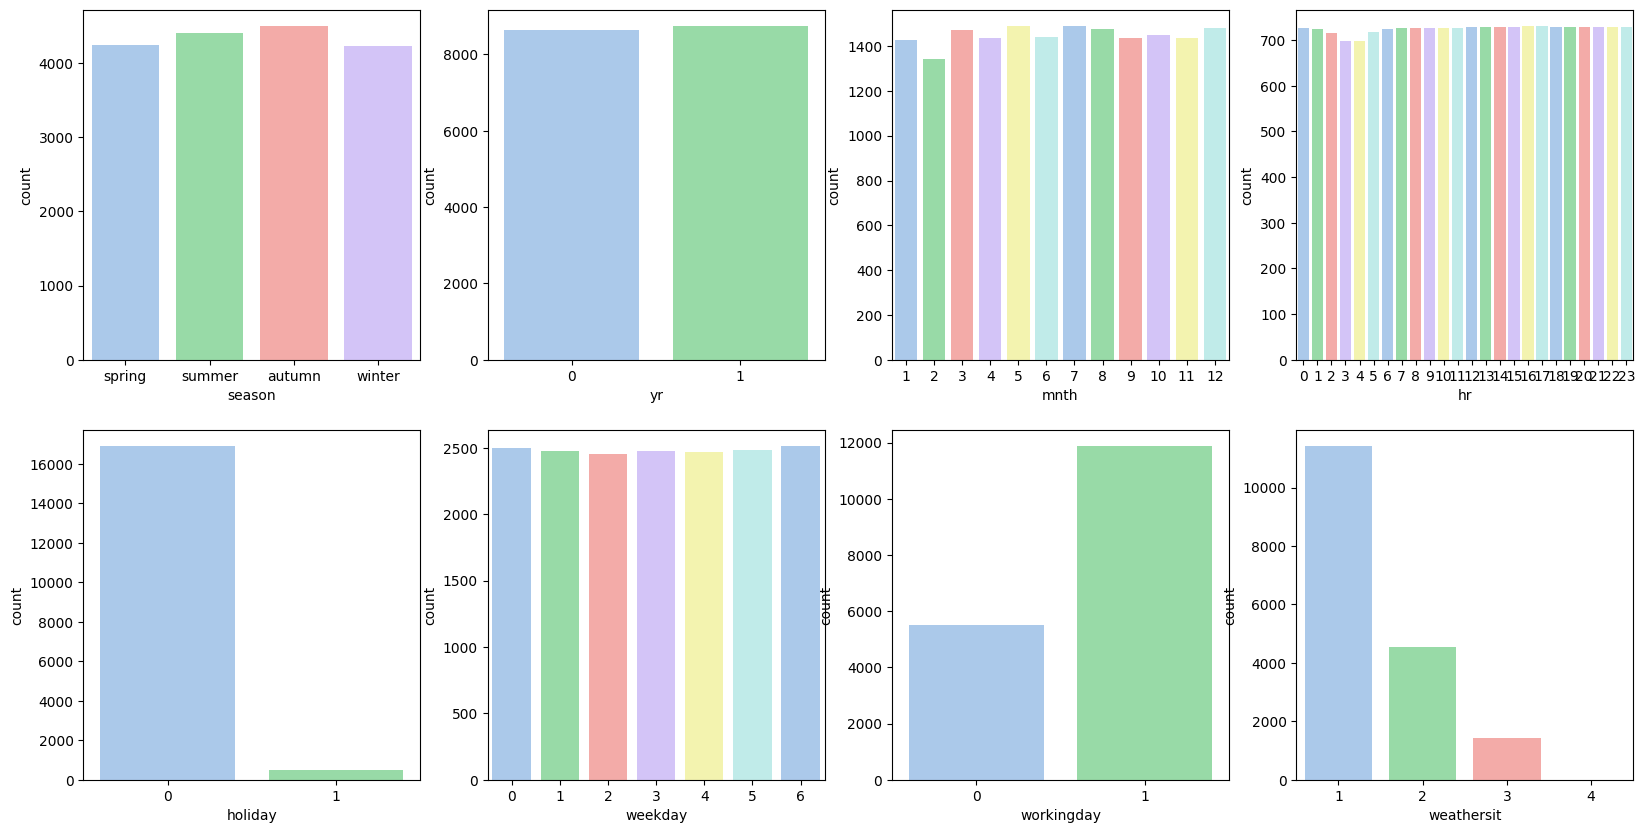

In [571]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(data_categorical, ax.flatten()):
  sns.countplot(data=data_categorical, x=variable, ax=subplot, palette='pastel6')

**Висновки з 5-7 завдання (детальні)**



1. В категоріальні змінні я виділив такі атрибути: **"season", "yr", "mnth", "hr", "holiday", "weekday", "workingday", "weathersit"**. Тепер у нас є окремий датасет для полегшеного аналізу категорій. 
2. Атрибути **season**. я перетворив так: **0 - Spring, 1 - Summer, 2 - Fall, 3 - Winter**. Ще в датасеті видно, що там помилка і розрахунок місяців коли починається з першого місяця позначенний, як **spring**, а не **winter**. Тому я замінив це щоб, номерний порядок місяців співпадав з реальною назвою пори року.
3. По графікам видно, що тут всі дані збалансовані та рівномірні, окрім деяких атрибутів, які показують погодні умови, святковий день чи робочий. Поки, по цих графіках видно, що викликів швидкої було найбільше в несвяткові дні, робочі та в хорошу погоду.



#Аналіз числових змінних

**Завдання 8** виділити числові змінні в окремий датасет

In [572]:
data_numerical = dataset_calls.loc[:, ["temp", "hum", "atemp", "windspeed", 'cnt']]
data_numerical

,temp,hum,atemp,windspeed,cnt
0,0.24,0.81,0.2879,0.0000,16
1,0.22,0.80,0.2727,0.0000,40
2,0.22,0.80,0.2727,0.0000,32
3,0.24,0.75,0.2879,0.0000,13
4,0.24,0.75,0.2879,0.0000,1
...,...,...,...,...,...
17374,0.26,0.60,0.2576,0.1642,119
17375,0.26,0.60,0.2576,0.1642,89
17376,0.26,0.60,0.2576,0.1642,90
17377,0.26,0.56,0.2727,0.1343,61


**Завдання 9** побудуйте гістограми розподілу по всім числовим змінним

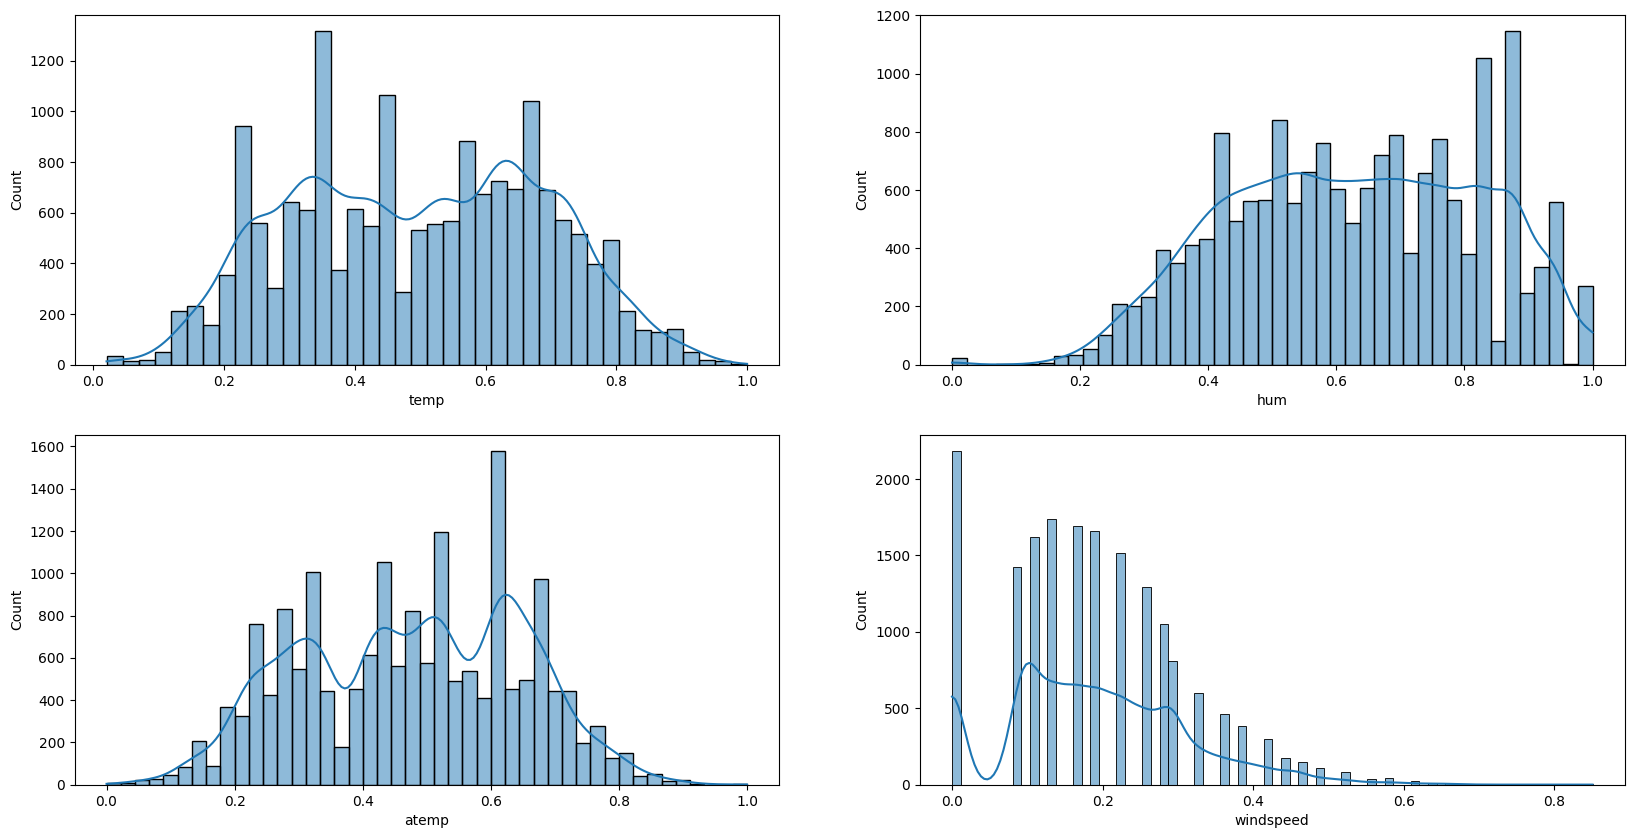

In [573]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for variable, subplot in zip(data_numerical, ax.flatten()):
  sns.histplot(data=data_numerical, x=variable, ax=subplot, palette='pastel6', kde=True)

**Завдання 10** побудуйте гістограму розподілу цільової змінної та розрахуйте коефіціент нахилу

Skewness: 1.2773013463494975


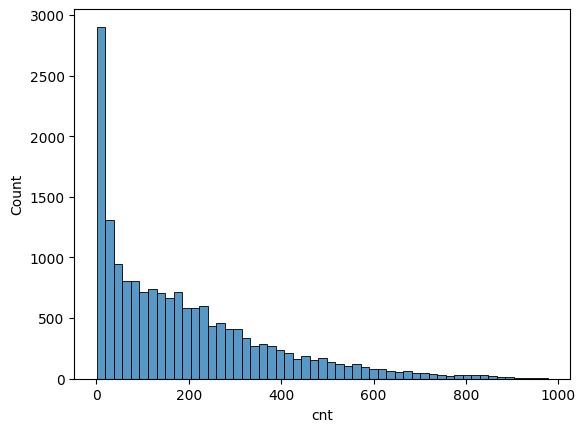

In [574]:
sns.histplot(data=dataset_calls, x="cnt", palette='pastel6')

skewness = sc.stats.skew(dataset_calls["cnt"])
print(f'Skewness: {skewness}')

**Висновки з 8-10 завдання (детальні)**



1. Та сама історія з числовими змінними, виділив їх в 4 групи: **"temp", "hum", "atemp", "cnt"**. Тепер є також окремий датасет для аналізу неперевних змінних.
2. Гістограма розподілу змінної **temp** є **Бімодальним** розподілом, там чітко видно два горби. **atemp** **Мультимодальним** розподілом, тут видніються уже 3 горби. Атрибут **hum** є **Рівномірним** розподілом, по kde видно, що дані там розподіленні рівномірно. І **windspeed** є **Логарифмічним** розподілом з великим outlier'ом на початку. Також на графіку **windspeed** видно дуже великий хвіст вправо.
3. Наша цільова змінна **cnt** є **Геометричним** розподілом, та має коефіцієнт скошенності **1.277**. Цей коефецієнт скошеності показує, що розподіл скошений праворуч. Також розподіл має дуже великий хвіст, тому рахується важким. 



#Аналіз взаємозв'язків між числовими і категоріальними змінними

**Завдання 11** побудуйте графіки співвідношення `scatterplot` між всіма числовими змінними і цільовою змінною `cnt`

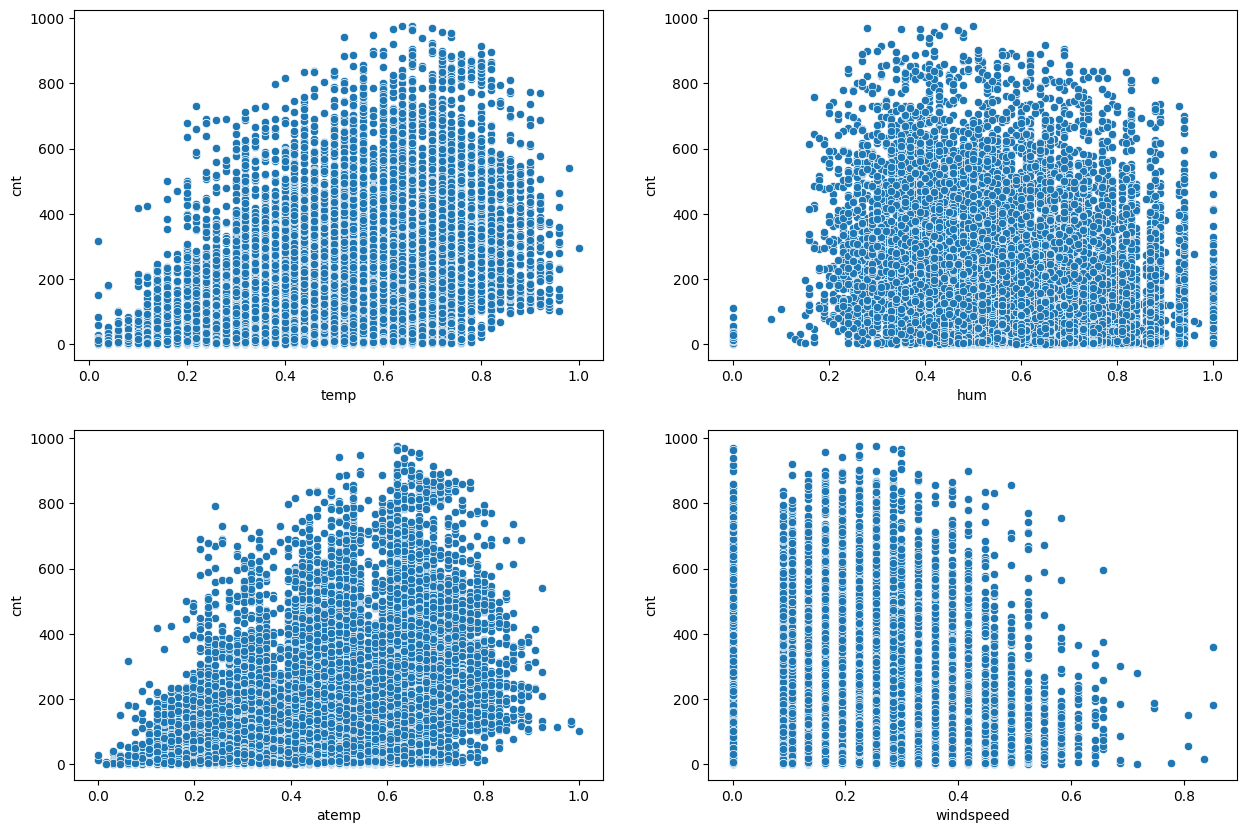

In [575]:
fig, ax = plt.subplots(2,2, figsize=(15, 10))
for var, subplot in zip(data_numerical.drop('cnt', axis=1), ax.flatten()):
  sns.scatterplot(data=data_numerical, x=var, y=dataset_calls['cnt'], ax=subplot, palette='pastel6')

**Завдання 12** побудуйте графіки співвідношення `boxplot` [boxplot](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html) між категоріальними змінними і цільовою змінною `cnt`.

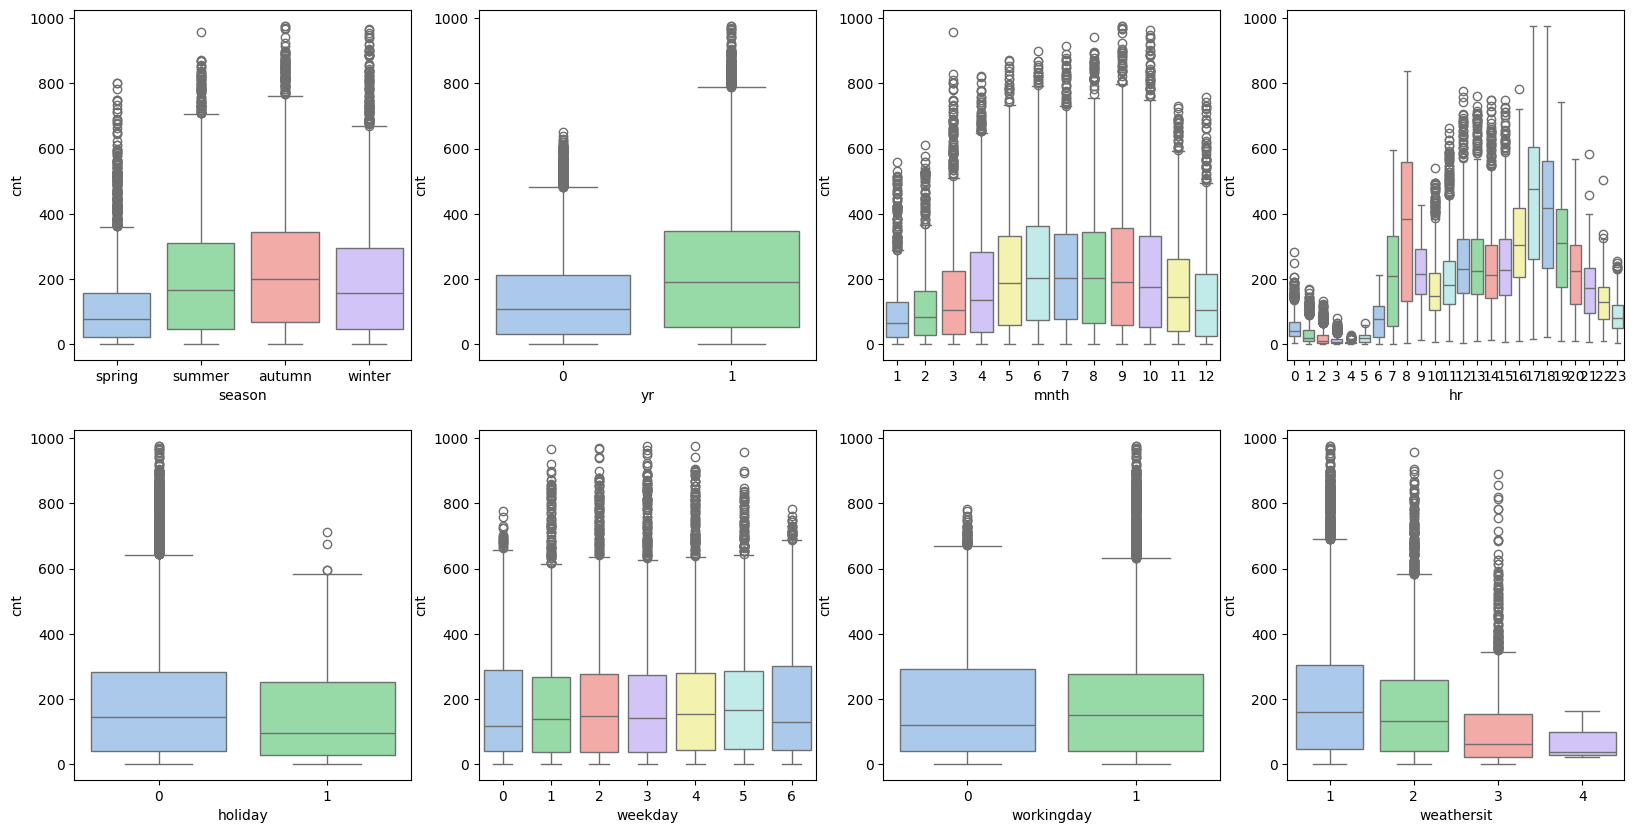

In [576]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for var, subplot in zip(data_categorical, ax.flatten()):
  sns.boxplot(data=data_categorical, x=var, y=dataset_calls['cnt'], ax=subplot, palette='pastel6')

**Висновки з 11-12 завдання (детальні)**



1. По графіках **temp та atemp** видно, що трішки є кореляція між цими змінними та цільовим атрибутом. Але між **hum** та **cnt** кореляції немає, там значення розподілені майже рівномірно. На графіку **windspeed** теж є трішки кореляції, викликів більше коли швидкість вітру менша.
2. Якщо дивитись на графік годин (**hr**), то можна побачити, що найбільше викликів швидкої зосереджено на години **6 - 9** ранку та **16 - 21** вечора. На всіх інших графіках можемо побачити, що вони мають багато аномальних значень, які не співпадають у визначенні квартилі.



**Завдання 13** Побудувати матрицю кореляції:  

1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти  
3.   Вирахувати кореляційні коефіціенти для набору данних за методом Спірмана
4.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

5. Описати отримані результати, спираючись на значення коефіціентів кореляції та пояснити в чому відмінність обраних методів.

<Figure size 2000x2000 with 0 Axes>

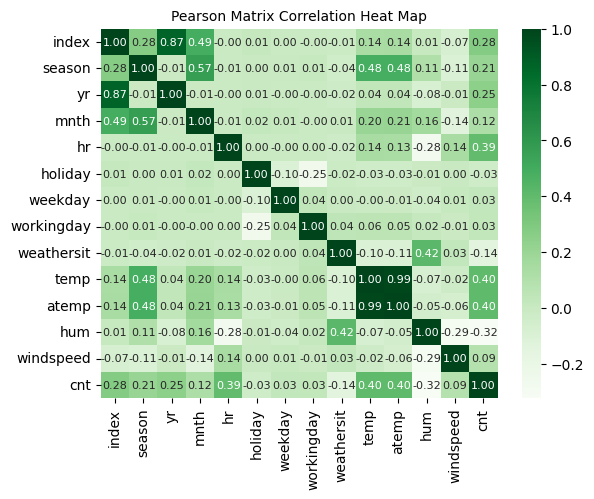

<Figure size 2000x2000 with 0 Axes>

In [577]:
pearson_corr = dataset_calls.select_dtypes(include={"float64", "int64"}).corr(method='pearson')
sns.heatmap(pearson_corr, annot=True ,cmap='Greens', fmt='.2f', annot_kws={"size": 8})
plt.title("Pearson Matrix Correlation Heat Map", fontsize=10)
plt.figure(figsize=(20, 20))

<Figure size 2000x2000 with 0 Axes>

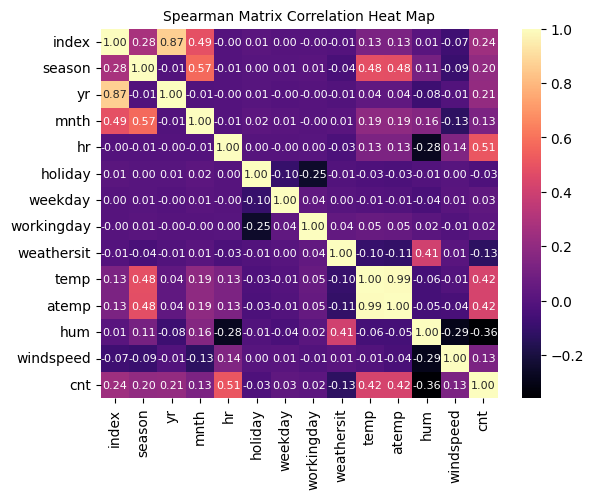

<Figure size 2000x2000 with 0 Axes>

In [578]:
spearman_corr = dataset_calls.select_dtypes(include={"float64", "int64"}).corr(method='spearman')
sns.heatmap(spearman_corr, annot=True ,cmap='magma', fmt='.2f', annot_kws={"size": 8})
plt.title("Spearman Matrix Correlation Heat Map", fontsize=10)
plt.figure(figsize=(20, 20))

На ціх теплових картках найвираженіша залежність присутня між атрибутами **temp та atemp**. Це мультиколінеарність. Від неї нам в подальшому доведеться позбутися.
Ще видно доволі високий коефіцієнт кореляції між цільовою змінною **cnt** та **hr**. Також можна побачити саме різницю між методами, що **Pearson** показує коефіцієнт **0.39**, а от **Spearman** показує уже **0.51**. Ще є кореляції між **cnt** і температурами та **hum**.

Основна відмінність між методами полягає у тому, як вони враховують структуру даних. Кореляція Пірсона оцінює лінійну залежність між значеннями змінних, тоді як кореляція Спірмена оцінює монотонну залежність між рангами цих значень. Тому в нашому випадку доцільніше використовувати метод Спірмана, тому що ми не маємо нормального розподіло, та у нас присутня монотонна залежність.

**Завдання 14** 
1. побудувати модель лінійної регресії:
2. видалити змінні, які НЕ є релевантними;

3. поділити вибірку на `train`, `test` та `validation` в пропорції `70/30`;  

4. провести навчання моделі лінійної регресії;

1. Для подальшої роботи з моделями для кожної категоріальної змінної ми створимо фіктивні змінні, щоб уникнути неправильного порядку категорій. [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [579]:
def get_dummies(df: pd.DataFrame):
  features = pd.concat([df,
                      pd.get_dummies(df['hr'], prefix='hr'),
                      pd.get_dummies(df['yr'], prefix='yr'),
                      pd.get_dummies(df['workingday'], prefix='workingday'),
                      pd.get_dummies(df['season'], prefix='season'),
                      pd.get_dummies(df['mnth'], prefix='mnth'),
                      pd.get_dummies(df['weekday'], prefix='weekday'),
                      pd.get_dummies(df['weathersit'], prefix='weathersit'),
                      ], axis = 1
                     )
  features = features.drop(['season',
                            'mnth',
                            'weekday', 
                            'weathersit'
                            ], axis = 1)
  return features

In [580]:
features = get_dummies(dataset_calls)

2. На основі змінної часу створіть нову змінну, яка відповідатиме за день і ніч.

In [581]:
# 1 - night, 0 - day
features['night_hours'] = features['hr'].apply(lambda x: 1 if ((x >= 22 and x <= 23) or (x >= 0 and x <= 6)) else 0)
features = features.drop('hr', axis = 1)

In [582]:
features['night_hours'].sample(15)

864      0
17308    1
16079    0
16214    0
6135     1
6173     0
10125    1
4943     0
368      0
4049     0
5142     1
12363    0
8596     1
6406     0
5963     1
Name: night_hours, dtype: int64

**Модель лінійної регрессії  

[train_linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Після отримання фіктивних змінних потрібно видалити по одній з кожної категорії, щоб запобігти мультиколінеарності. Також видаляємо ще два атрибути `date` та `atemp` - поясніть чому?

In [583]:
features_lr = features.drop(['season_0', 'mnth_4', 'weekday_0', 'weathersit_1', 'hr_0', 'atemp', 'date'], axis = 1)

In [584]:
def get_train_data(df: pd.DataFrame, target:str, test_size:float):
  x = df.drop([target], axis=1)
  y = df[target]
  X_train, X_test, y_train, y_test =  train_test_split(x, y, test_size=test_size, random_state=42, shuffle = True)
  return X_train, X_test, y_train, y_test

In [585]:
X_train, X_test, y_train, y_test = get_train_data(features_lr, 'cnt', 0.3)

In [586]:
features_lr.dtypes

index             int64
yr                int64
holiday           int64
workingday        int64
temp            float64
hum             float64
windspeed       float64
cnt               int64
hr_1               bool
hr_2               bool
hr_3               bool
hr_4               bool
hr_5               bool
hr_6               bool
hr_7               bool
hr_8               bool
hr_9               bool
hr_10              bool
hr_11              bool
hr_12              bool
hr_13              bool
hr_14              bool
hr_15              bool
hr_16              bool
hr_17              bool
hr_18              bool
hr_19              bool
hr_20              bool
hr_21              bool
hr_22              bool
hr_23              bool
yr_0               bool
yr_1               bool
workingday_0       bool
workingday_1       bool
season_1           bool
season_2           bool
season_3           bool
mnth_1             bool
mnth_2             bool
mnth_3             bool
mnth_5          

In [587]:
def train_linear_model(X_train, y_train):
  model = LinearRegression()
  model.fit(X_train, y_train)
  return model

model = train_linear_model(X_train, y_train)

In [588]:
# predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# scores
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 10580.773, test: 10254.299
R^2 train: 0.684, test: 0.675


Оскільки в нашій моделі є багато незалежних змінних, ми не можемо відобразити їх залежність у двовимірному просторі, але ми можемо побудувати графік взаємозв'язку між залишками моделі та передбачуваними значеннями, що також допоможе нам оцінити якість моделі.

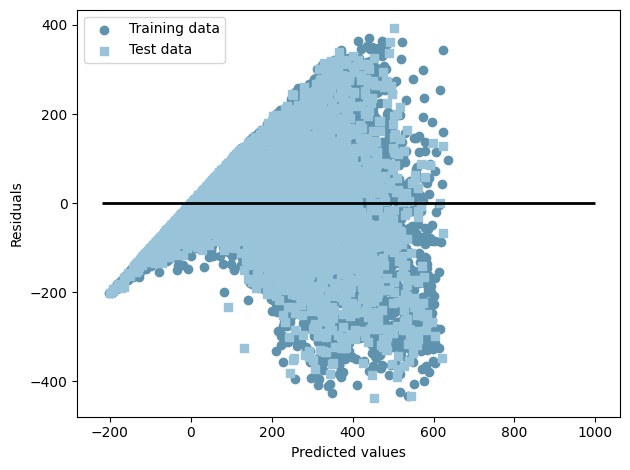

In [589]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='#5f93ad', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='#98c3d9', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-220, xmax=1000, lw=2, color='#000000')
plt.tight_layout()

**Висновки з завдання (детальні)**



1. Ми створили фіктивні змінні для тренування нашої моделі, також видаливши деякі атрибути щоб уникнути мультиколінеарності. Також ще додали новий атрибути **night_hours**, який показує нічний час від 22 до 6 години.
2. Також при видаленні атрибутів ми видалили нерелавантні змінні такі як **date** та **atemp**. Date нам просто не потрібне для тренування моделі, а ось **atemp**, це ідентична змінна з кореляцією 0.99 до атрибуту **temp**, тому вона нам просто не потрібна щоб також уникнути мультиколінеарності.
3. Ми взяли дані в пропорції 70/30. 70 - відкидуємо, і 30 - беремо для тренування. Після тренування ми можемо сказати, що точність нашої моделі **68.4%**(для навчання) та **67.5%**(для тестування), що є досить добрим результатом. Наша модель має деякі прогалини в тренуванні, але все одно може зробити досить хороший аналіз. По графіку можемо побачити, що є досить багато аномальних значеннь, але результати тренування непогані.

